# **Import necessary libraries and load the dataset**

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/train.csv')

# Drop the 'Unnamed: 0' column as it is just the index
df = df.drop(columns=['Unnamed: 0'])

### Display the first few rows of the dataset and the general description


In [10]:
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

### Univariate Analysis

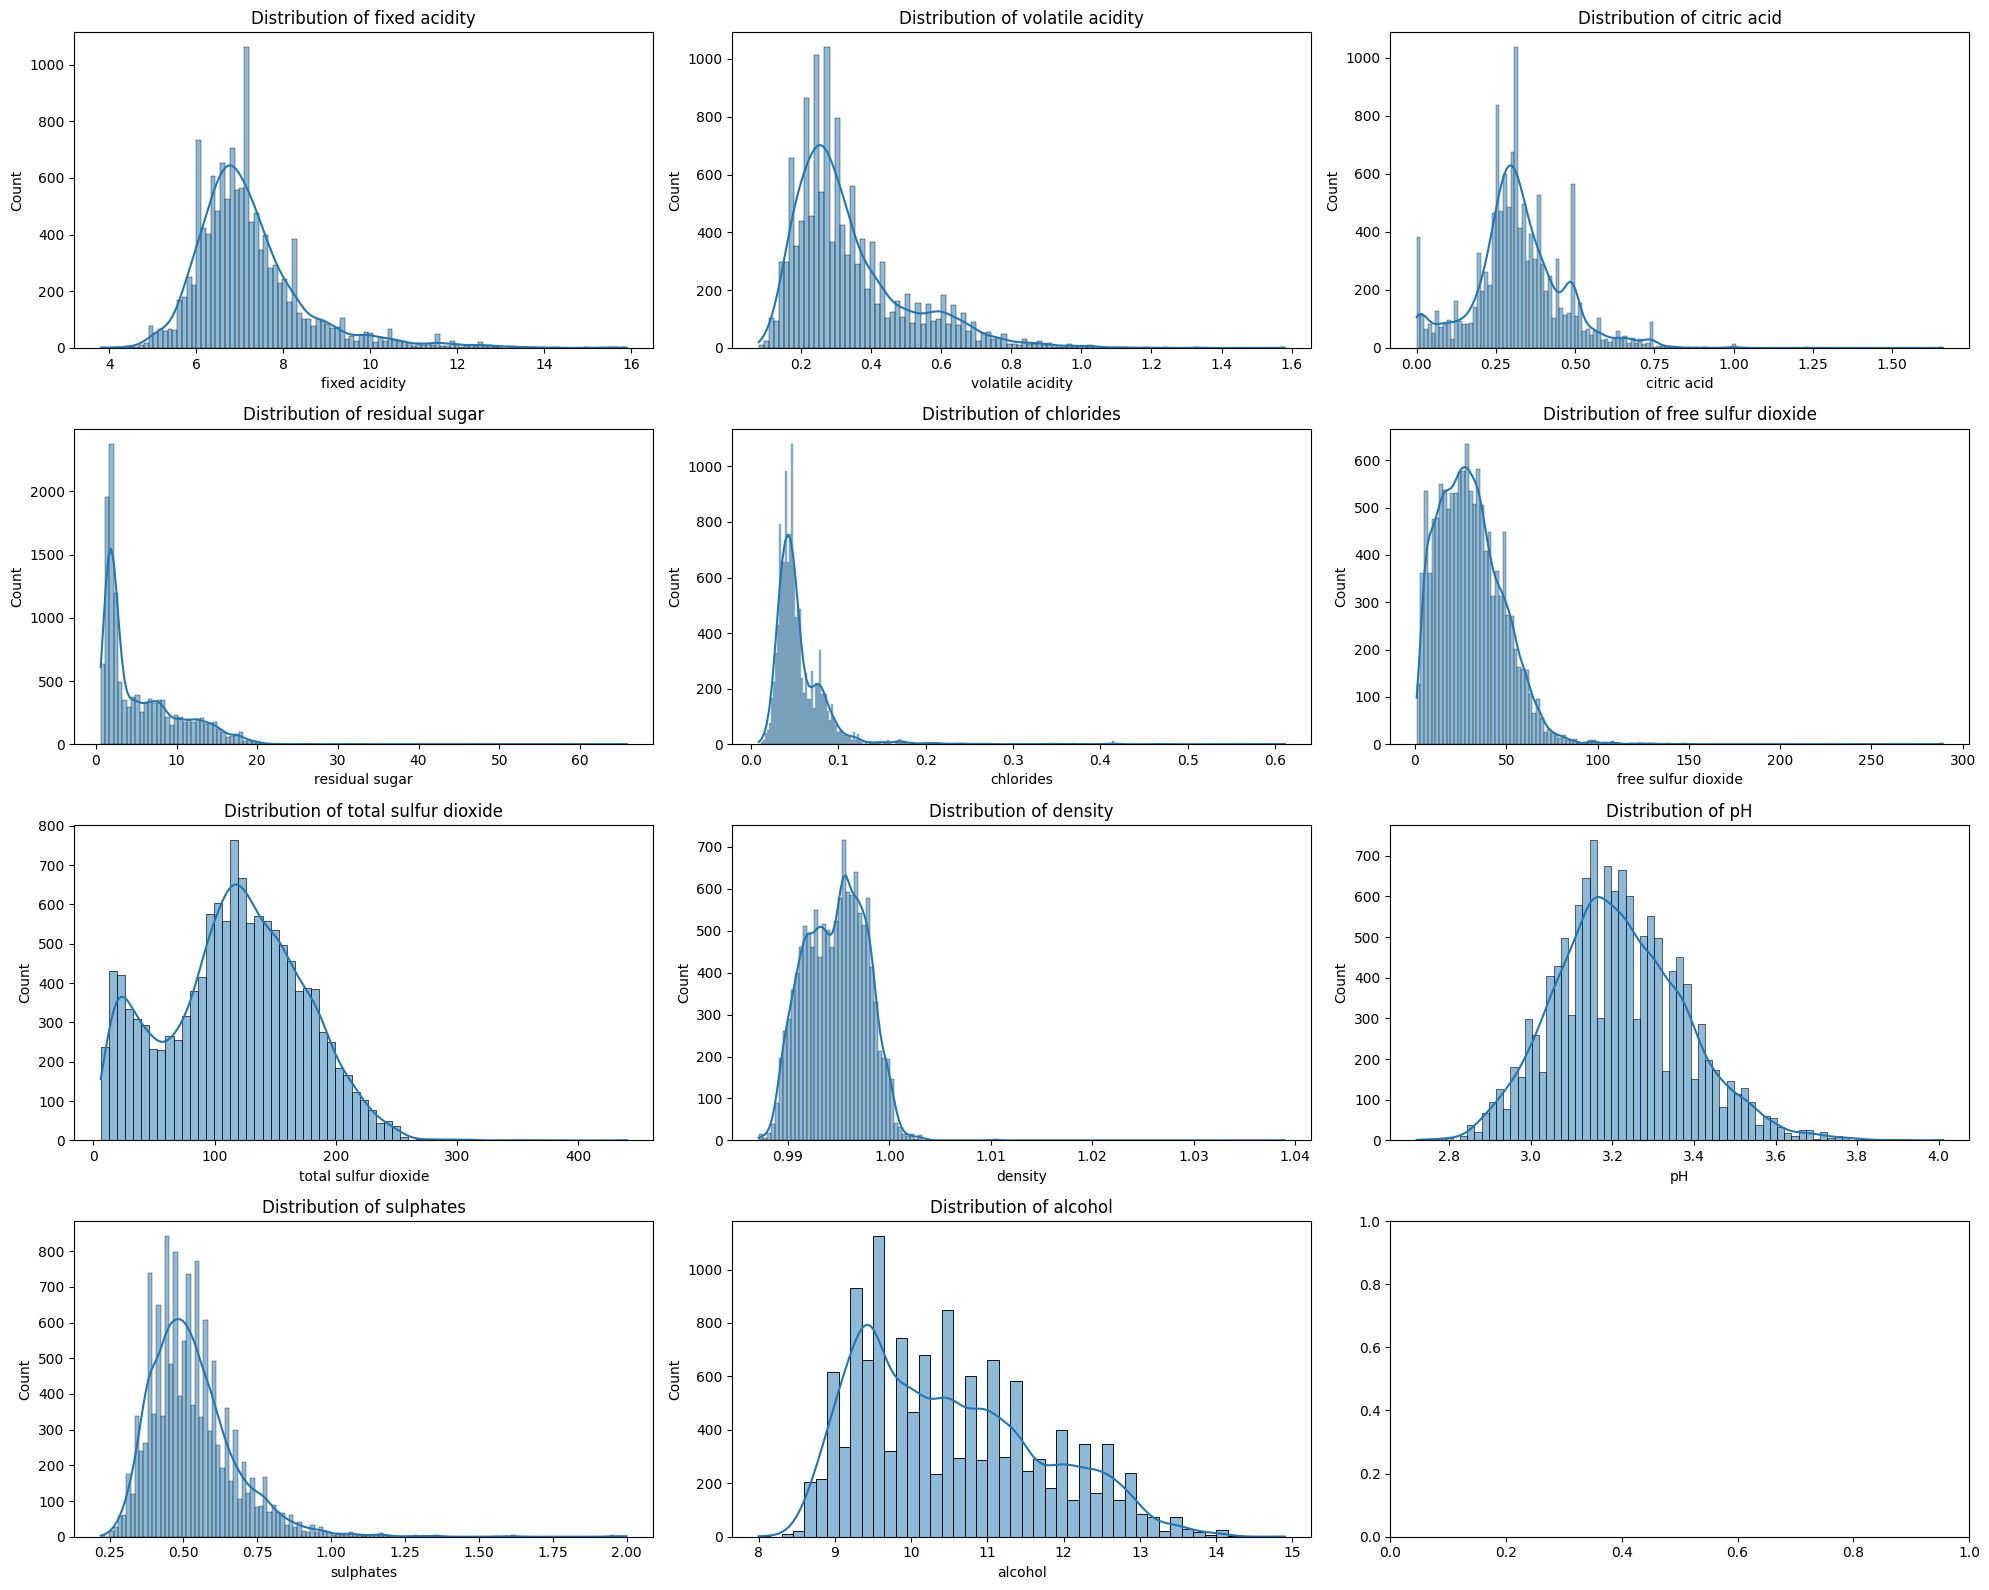

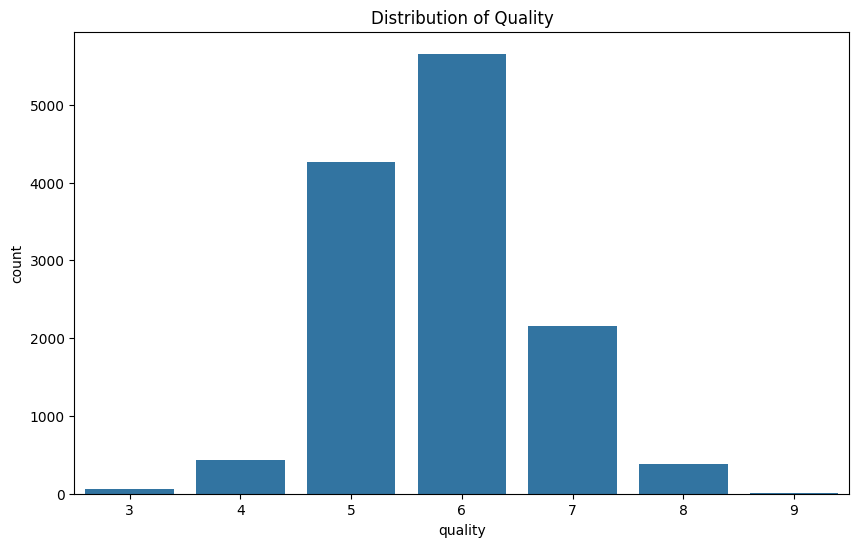

In [11]:
# Visualize the distribution of each feature
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 16))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Exclude 'quality'
    if df[col].nunique() > 1:  # Only plot if there are multiple unique values
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
    else:
        axes[i].set_visible(False)  # Hide empty subplots
plt.tight_layout()
plt.show()

# Visualize the target variable (quality)
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Quality')
plt.show()

### Bivariate Analysis

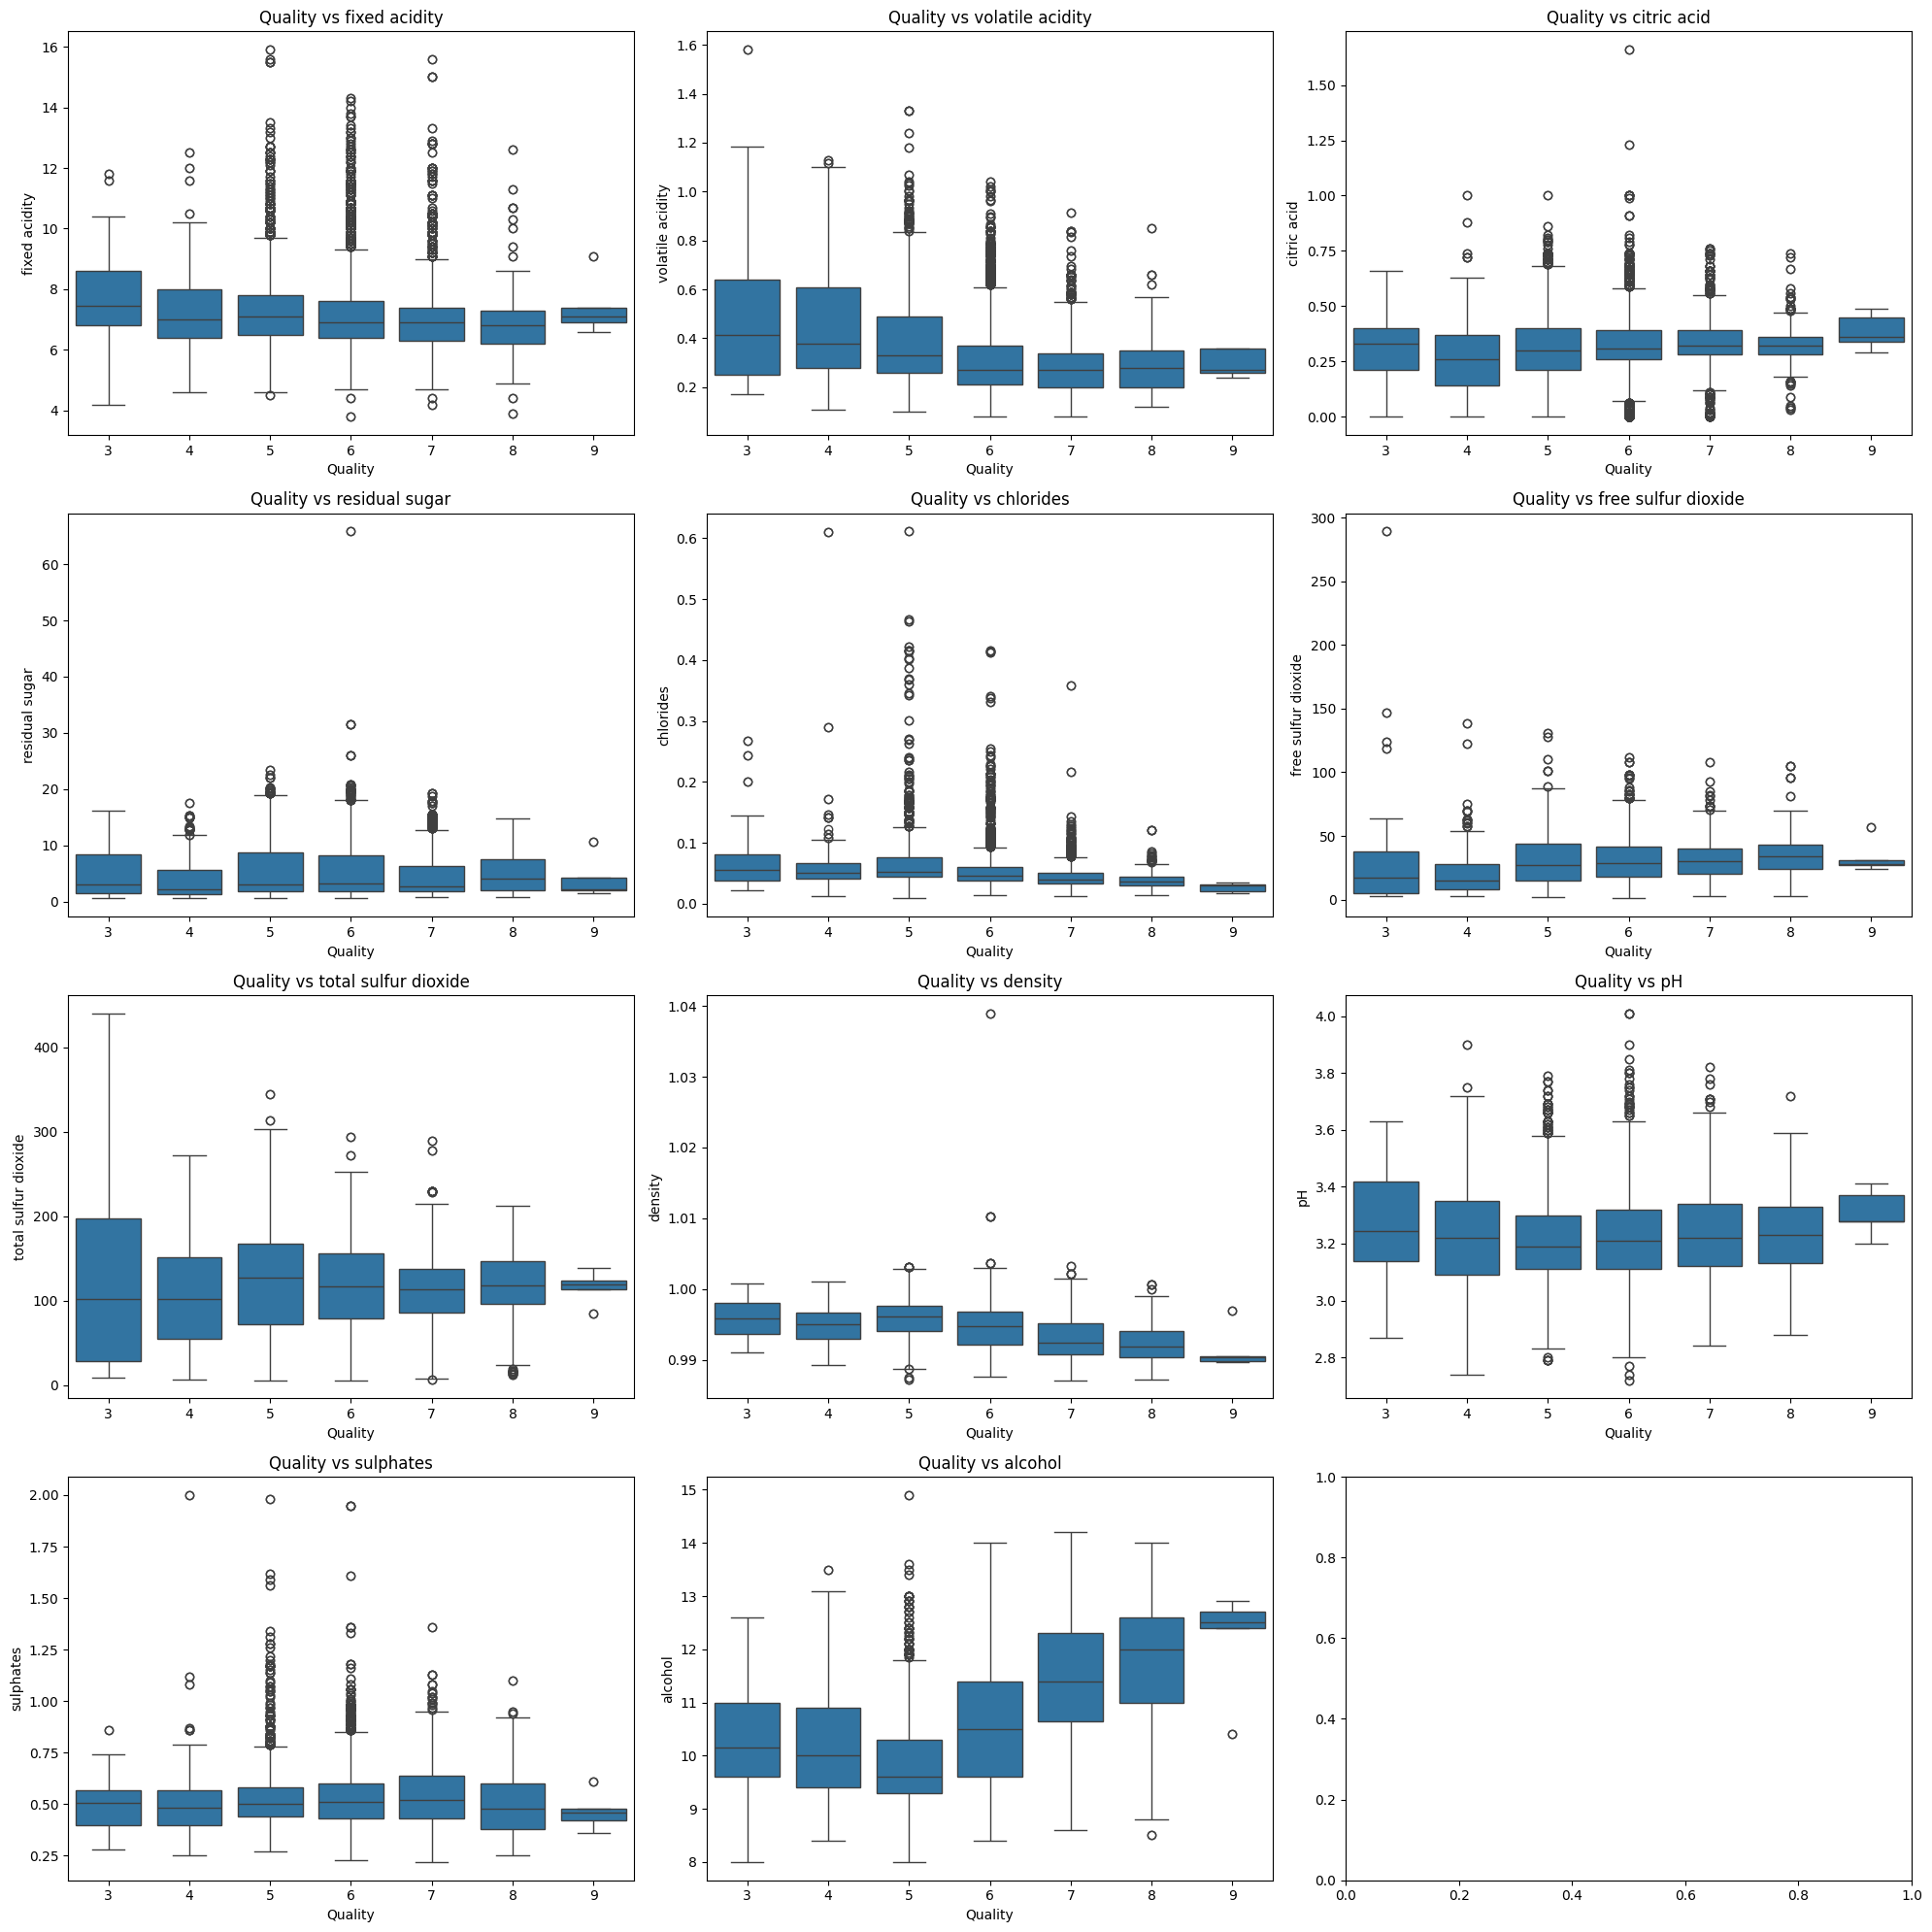

In [12]:
# Explore relationships between features and the target variable using box plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-1]):  # Exclude 'quality'
    if df[col].nunique() > 1:  # Only plot if there are multiple unique values
        sns.boxplot(x='quality', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Quality vs {col}')
        axes[i].set_xlabel('Quality')
        axes[i].set_ylabel(col)
    else:
        axes[i].set_visible(False)  # Hide empty subplots

plt.tight_layout()
plt.show()

### Correlation Analysis

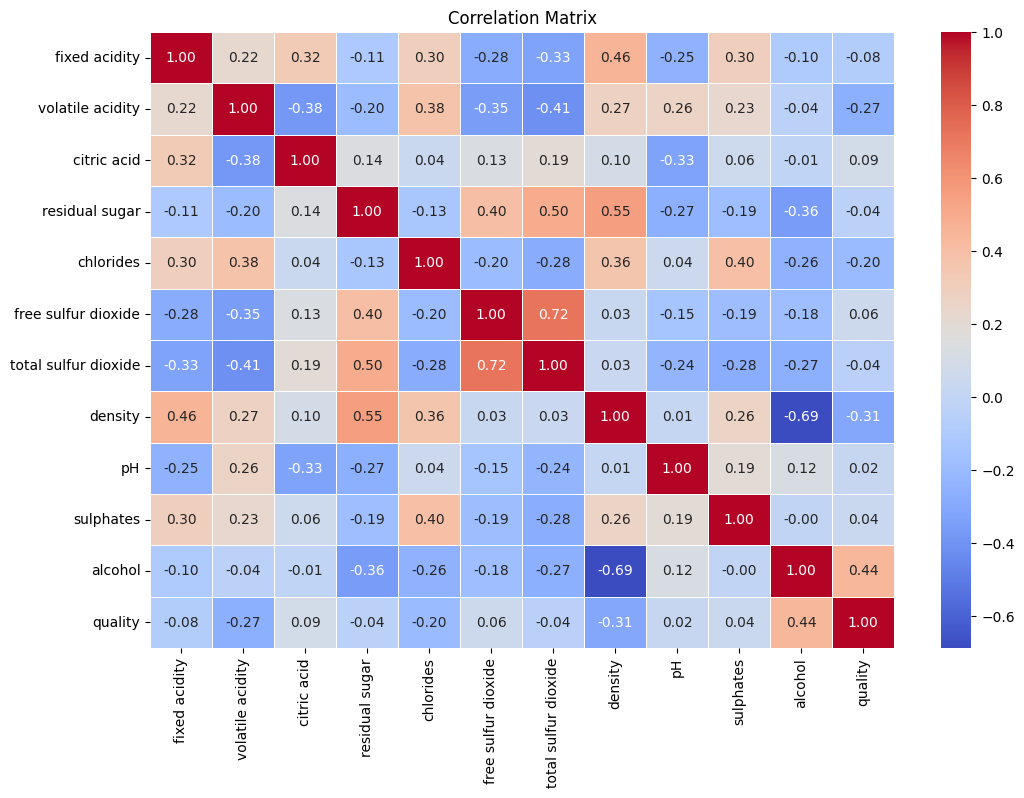

In [13]:
# Compute and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Feature Importance Analysis

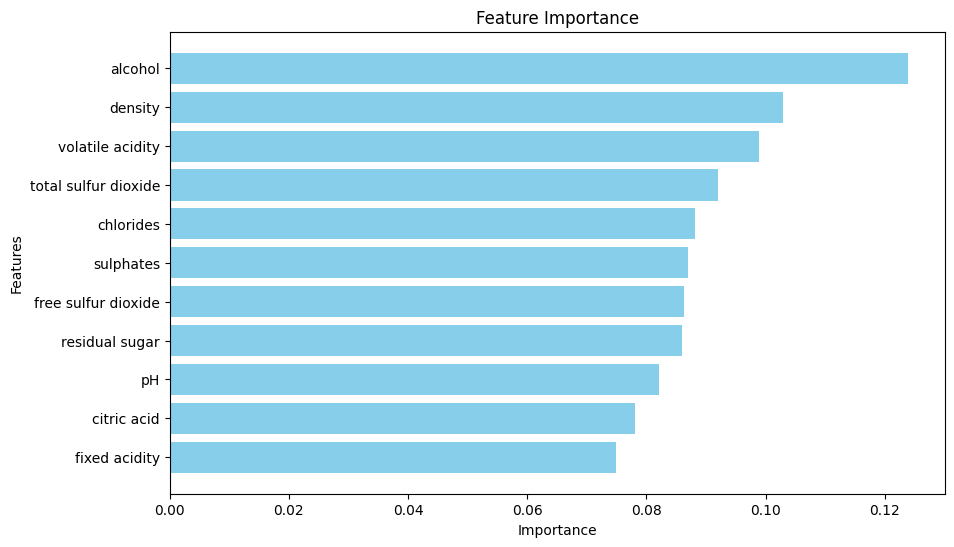

In [15]:
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe to visualize the importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the Y-axis to have the most important features on top
plt.show()